### **EchoVision: An Intelligent Image Narration System for Accessibility Support**

In [1]:
! pip install Pillow matplotlib timm

  Obtaining dependency information for Pillow from https://files.pythonhosted.org/packages/31/03/bef822e4f2d8f9d7448c133d0a18185d3cce3e70472774fffefe8b0ed562/pillow-12.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/6f/d3/a4bbc01c237ab710a1f22b4da72f4ff6d77eb4c7735ea9811a94ae239067/matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ---------------------- --------------- 30.7/52.8 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 52.8/52.8 kB 390.8 kB/s eta 0:00:00
  Obtaining dependency information for timm from https://files.pythonhosted.org/packages/92/dd/c1f5b0890f7b5db661bde0864b41cb0275be76851047e5f7e085fe0b455a/timm-1.0.24-py3-none-any.whl.metadata
  Obtai


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### **Step-1 Loading the image data**

In [2]:
!pip install Pillow
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


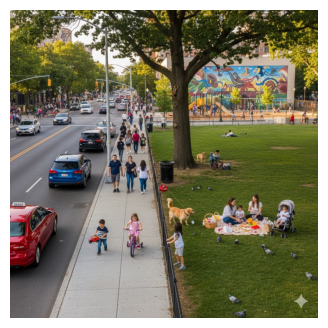

In [50]:
from PIL import Image
import matplotlib.pyplot as plt
project_img = Image.open("images/cv_test.jpg")

# Display the image using Matplotlib
plt.figure(figsize=(6, 4))
plt.imshow(animals_img)
plt.axis('off') 
plt.show()

### **Step-2 CV Task-Object Detection**

In [14]:
 !pip install timm


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!pip install transformers
from transformers import pipeline
object_detection = pipeline(
    task="object-detection",
    model="facebook/detr-resnet-50",
)


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Loading weights:   0%|          | 0/530 [00:00<?, ?it/s]

DetrForObjectDetection LOAD REPORT from: facebook/detr-resnet-50
Key                                                            | Status     |  | 
---------------------------------------------------------------+------------+--+-
model.backbone.model.layer3.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer1.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer2.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer4.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
The image processor of type `DetrImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. 


In [42]:
detections = object_detection(project_img)

detections

[{'score': 0.6289482712745667,
  'label': 'person',
  'box': {'xmin': 323, 'ymin': 273, 'xmax': 346, 'ymax': 316}},
 {'score': 0.9922031164169312,
  'label': 'person',
  'box': {'xmin': 217, 'ymin': 555, 'xmax': 264, 'ymax': 650}},
 {'score': 0.7648033499717712,
  'label': 'car',
  'box': {'xmin': 308, 'ymin': 219, 'xmax': 337, 'ymax': 239}},
 {'score': 0.9233529567718506,
  'label': 'car',
  'box': {'xmin': 285, 'ymin': 240, 'xmax': 312, 'ymax': 266}},
 {'score': 0.9128718972206116,
  'label': 'traffic light',
  'box': {'xmin': 232, 'ymin': 191, 'xmax': 242, 'ymax': 209}},
 {'score': 0.969504177570343,
  'label': 'traffic light',
  'box': {'xmin': 224, 'ymin': 190, 'xmax': 235, 'ymax': 208}},
 {'score': 0.8881396055221558,
  'label': 'bird',
  'box': {'xmin': 547, 'ymin': 602, 'xmax': 561, 'ymax': 620}},
 {'score': 0.9810290932655334,
  'label': 'person',
  'box': {'xmin': 632, 'ymin': 488, 'xmax': 676, 'ymax': 559}},
 {'score': 0.9125484228134155,
  'label': 'bird',
  'box': {'xmin':

In [43]:
from collections import Counter
label_counts = Counter(d["label"] for d in detections)
label_counts

Counter({'car': 21,
         'person': 19,
         'bird': 10,
         'handbag': 10,
         'traffic light': 5,
         'apple': 3,
         'dog': 2,
         'sports ball': 1,
         'bicycle': 1})

In [44]:
def pluralize(label, count):
    irregular = {"person": "people"}
    if count == 1:
        return label
    if label in irregular:
        return irregular[label]
    return label + "s"

def counts_to_text(label_counts):
    if not label_counts:
        return "I could not detect any objects."

    items = sorted(label_counts.items(), key=lambda x: (-x[1], x[0]))
    parts = [f"{count} {pluralize(label, count)}" for label, count in items]

    if len(parts) == 1:
        return f"The image contains {parts[0]}."
    else:
        return "The image contains " + ", ".join(parts[:-1]) + " and " + parts[-1] + "."

text_description = counts_to_text(label_counts)
print(text_description)

The image contains 21 cars, 19 people, 10 birds, 10 handbags, 5 traffic lights, 3 apples, 2 dogs, 1 bicycle and 1 sports ball.


In [45]:
full_text = "Hi user! Here is what I can see in the image: " + counts_to_text(label_counts)
print(full_text)


Hi user! Here is what I can see in the image: The image contains 21 cars, 19 people, 10 birds, 10 handbags, 5 traffic lights, 3 apples, 2 dogs, 1 bicycle and 1 sports ball.


In [1]:
! pip install datasets soundfile librosa


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### **Step-3 CV Text to Speech**

In [2]:
from transformers import pipeline

narrator = pipeline(
    task="text-to-speech",
    model="suno/bark-small",
)

config.json: 0.00B [00:00, ?B/s]

C:\Users\mpathak\Desktop\AI solution Build\Project_image to audio\.env_echovision\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mpathak\.cache\huggingface\hub\models--suno--bark-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/542 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.1.weight to fine_acoustics.lm_heads.0.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.2.weight to fine_acoustics.lm_heads.1.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.3.weight to fine_acoustics.lm_heads.2.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_l

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

speaker_embeddings_path.json: 0.00B [00:00, ?B/s]

In [46]:

audio_out = narrator(full_text)

audio_arr = audio_out["audio"]
sr = audio_out["sampling_rate"]



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
Both `max_new_tokens` (=768) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=60) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=60) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both

In [54]:
from IPython.display import Audio, display

display(Audio(audio_arr, rate=sr))